# Accedents Data Set

### This dataset contains real accident records from the United Kingdom between 2021 and 2022, providing valuable insights into road safety trends. We will conduct an in-depth analysis of accident patterns, exploring factors such as time, location, road type, weather conditions, and severity levels. The data will be visualized using various techniques, including time series plots, heatmaps, and categorical distributions, to uncover hidden trends. Additionally, we will implement Three machine learning models: one for time series forecasting to predict future accident occurrences, another for classifying accident severity based on road and weather conditions and the third for predicting number of cassualties based on accedent severity. Through this comprehensive analysis, we aim to identify key risk factors, improve accident prevention strategies, and contribute to enhanced road safety measures.

### Importing Relevent Packages

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings("ignore")

### Importing data

In [168]:
df= pd.read_excel("C:/Users/Ma'mun/Desktop/New folder/Road Accident Data.xlsx")
df.head()

,Accident_Index,Accident Date,Month,Year,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Jan,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Jan,2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Jan,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Jan,2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Jan,2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


### Exploratory Data Analysis

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Year                        307973 non-null  int64         
 4   Day_of_Week                 307973 non-null  object        
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Latitude                    307973 non-null  float64       
 9   Light_Conditions            307973 non-null  object        
 10  Local_Authority_(District)  307973 non-null  object        
 11  Carriageway_Hazards         5424 non-nu

In [91]:
df.describe()

,Accident Date,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933


In [135]:
df[['Number_of_Casualties','Number_of_Vehicles','Speed_limit']].corr()

,Number_of_Casualties,Number_of_Vehicles,Speed_limit
Number_of_Casualties,1.000000,0.234499,0.137064
Number_of_Vehicles,0.234499,1.000000,0.079861
Speed_limit,0.137064,0.079861,1.000000


In [96]:
#vehicle types
Vehicle_Type= df['Vehicle_Type'].value_counts()
Vehicle_Type

Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

In [8]:
#weather conditions
Weather_Conditions= df['Weather_Conditions'].value_counts()
Weather_Conditions

Weather_Conditions
Fine no high winds       244496
Raining no high winds     34877
Other                      8802
Snowing no high winds      4839
Raining + high winds       3526
Fine + high winds          3148
Fog or mist                1690
Snowing + high winds        538
Name: count, dtype: int64

Text(0.5, 1.0, 'Accident Area')

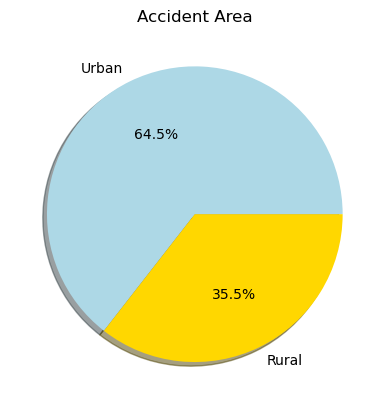

In [97]:
types = df.value_counts('Urban_or_Rural_Area')
plt.pie(types,labels=types.index,autopct = '%0.1f%%',shadow = True,colors=['lightblue','gold'])
plt.title('Accident Area')

Text(0.5, 1.0, 'Road Surface Conditions')

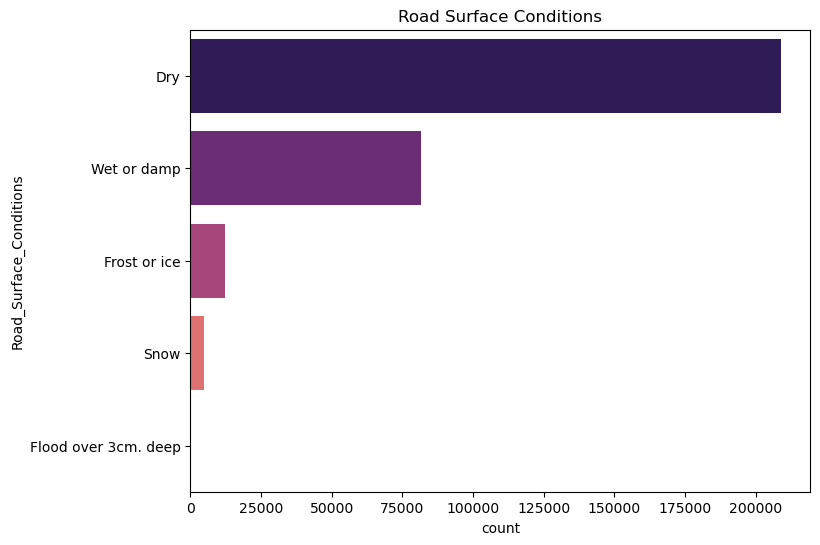

In [108]:
plt.figure(figsize=(8, 6))
order= df['Road_Surface_Conditions'].value_counts().index
sns.countplot(y='Road_Surface_Conditions',data=df,palette='magma',order=order)
plt.title('Road Surface Conditions')

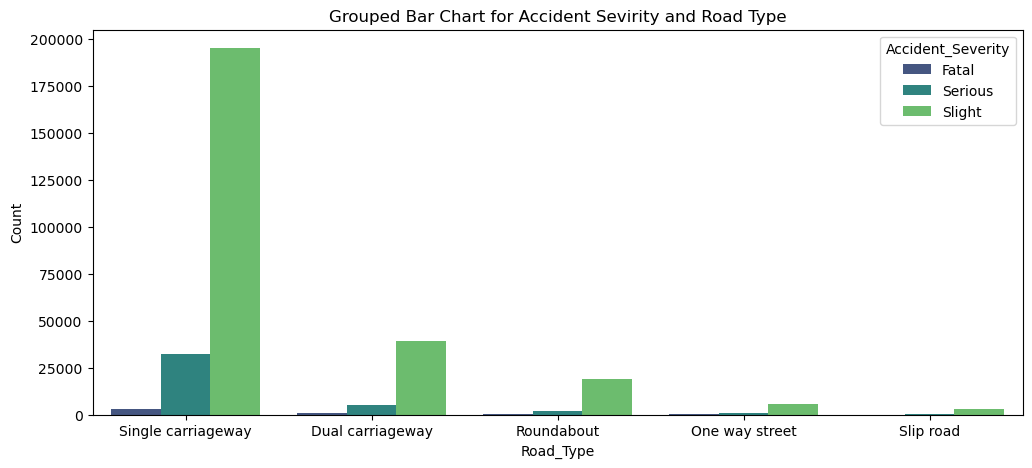

In [64]:
counts = df.groupby(['Accident_Severity', 'Road_Type']).size().reset_index(name='Count')
order= df['Road_Type'].value_counts().index
# Plot
plt.figure(figsize=(12,5))
sns.barplot(x='Road_Type', y='Count', hue='Accident_Severity', data=counts,palette='viridis',order=order)
plt.title("Grouped Bar Chart for Accident Sevirity and Road Type")
plt.show()

<Axes: xlabel='Light_Conditions', ylabel='count'>

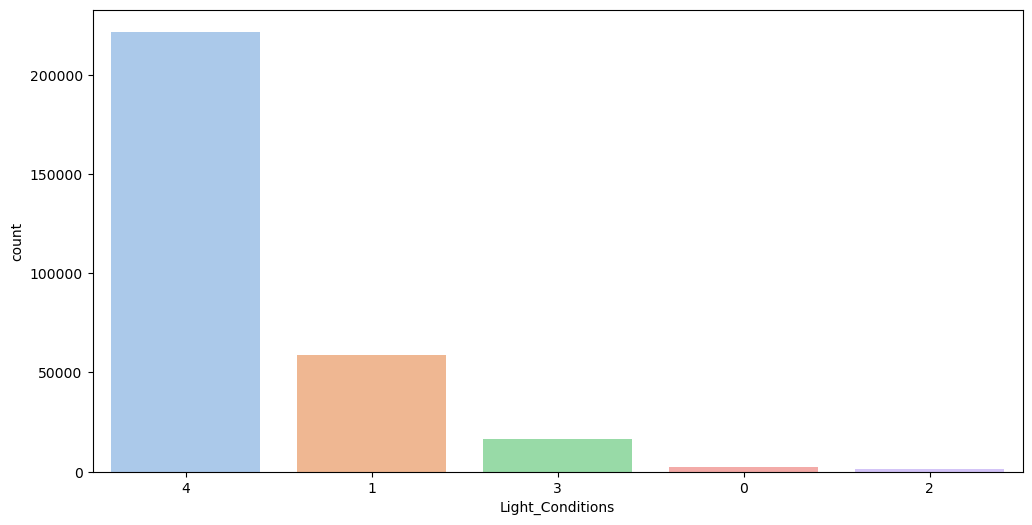

In [166]:
plt.figure(figsize=(12, 6))
order= df['Light_Conditions'].value_counts().index
sns.countplot(x='Light_Conditions',data=df,palette='pastel',order=order)


In [98]:
df['Accident_Severity'] = df['Accident_Severity'].map({'Serious':'Serious','Slight':'Slight','Fatal':'Fatal','fatal':'Fatal'})

Text(0.5, 1.0, 'Accedent Severity')

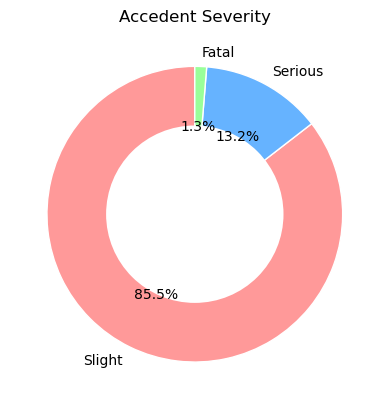

In [131]:
types = df.value_counts('Accident_Severity')
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(types, labels=types.index, autopct='%1.1f%%', startangle=90,colors=colors, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the "donut" effect
center_circle = plt.Circle((0,0), 0.6, fc='white')
plt.gca().add_artist(center_circle)
plt.title('Accedent Severity')

<Axes: xlabel='Road_Type', ylabel='count'>

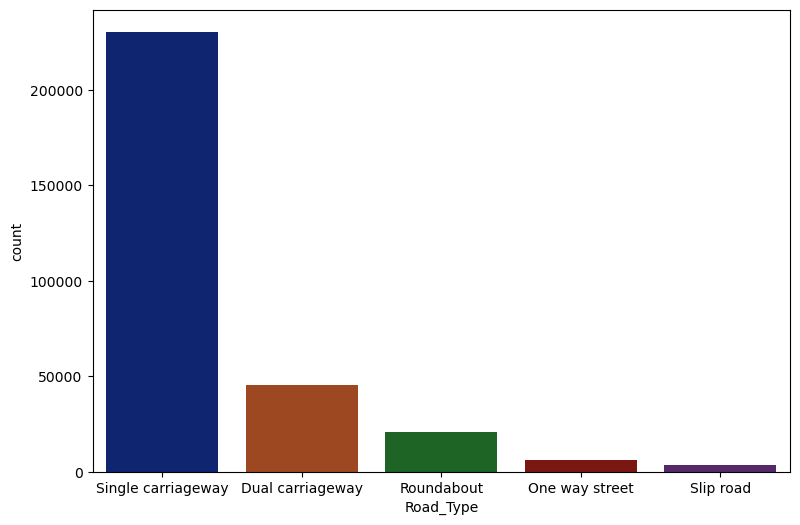

In [132]:
plt.figure(figsize=(9, 6))
order= df['Road_Type'].value_counts().index
sns.countplot(x='Road_Type',data=df,palette='dark',order=order)


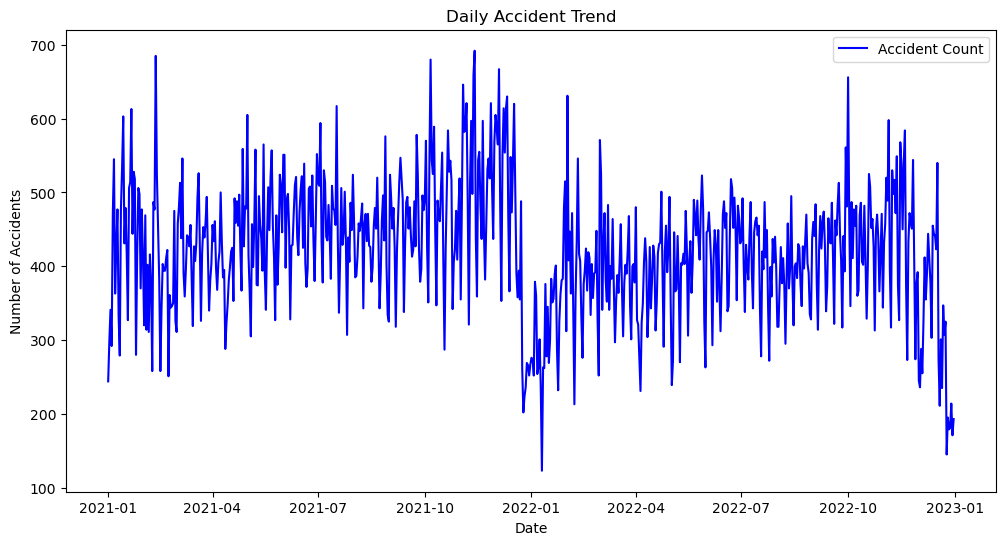

In [92]:
# Aggregate the number of accidents per day
df_time_series = df.groupby("Accident Date").size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Accident Count", color="blue")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Daily Accident Trend")
plt.legend()
plt.show()


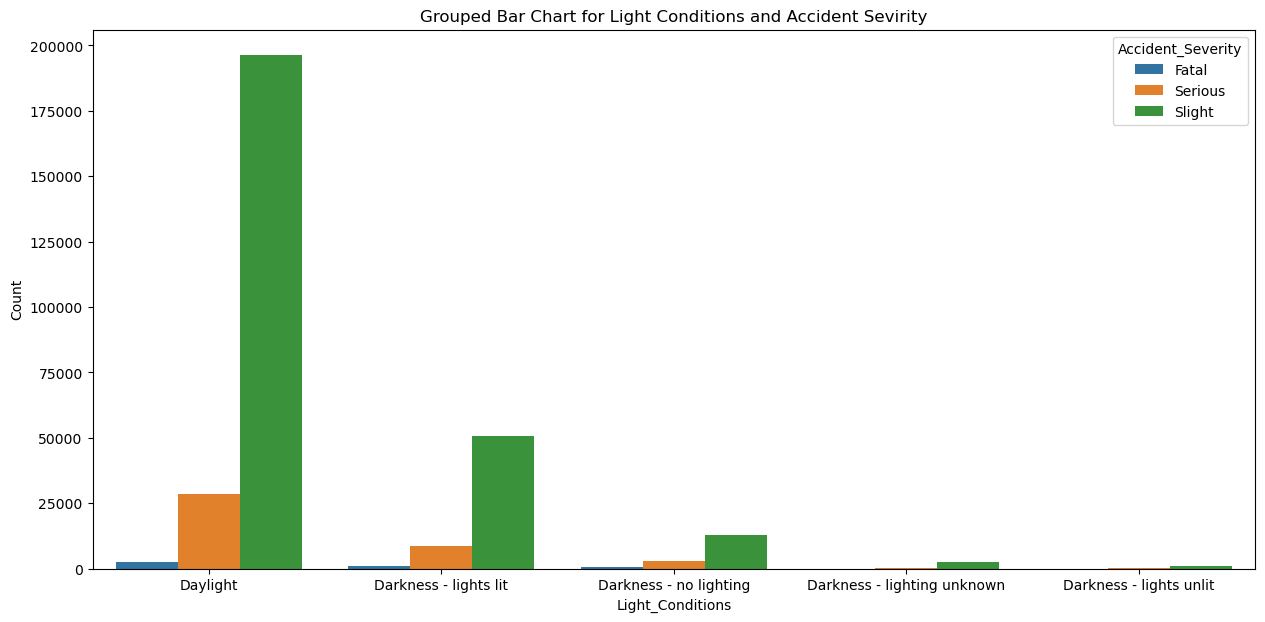

In [67]:
counts = df.groupby(['Accident_Severity', 'Light_Conditions']).size().reset_index(name='Count')
order= df['Light_Conditions'].value_counts().index
# Plot
plt.figure(figsize=(15,7))
sns.barplot(x='Light_Conditions', y='Count', hue='Accident_Severity', data=counts,order=order)
plt.title("Grouped Bar Chart for Light Conditions and Accident Sevirity")
plt.show()

### Machine Learning 

In [136]:
# precicting number of casualties based on severity
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Accident_Severity']])

In [137]:
from sklearn.model_selection import train_test_split
X=encoded
y=df['Number_of_Casualties']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy *100 :.2f}%")

accuracy: 76.41%


**The accuracy of this model shows 76.4% this means that this model will perform well in an unseen data**

ADF Statistic: -7.440174792004148
P-Value: 6.034847953002648e-11


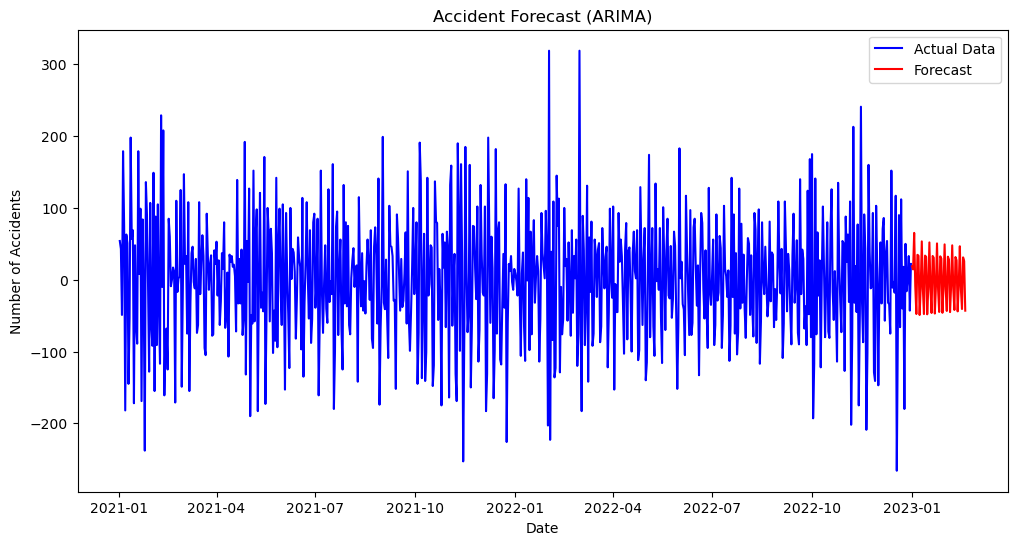

In [163]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Check stationarity using Augmented Dickey-Fuller Test
result = adfuller(df_time_series)
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")


# Fit ARIMA model
model = ARIMA(df_time_series, order=(3, 0, 3)) 
model_fit = model.fit()

# Forecast next 50 days
forecast = model_fit.forecast(steps=50)

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(df_time_series, label="Actual Data", color="blue")
plt.plot(forecast, label="Forecast", color="red", linestyle="solid")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Accident Forecast (ARIMA)")
plt.legend()
plt.show()


**This strongly indicates that the time series is stationary.**

accuracy: 85.20%

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       787
     Serious       0.22      0.00      0.00      8093
      Slight       0.85      1.00      0.92     51232

    accuracy                           0.85     60112
   macro avg       0.36      0.33      0.31     60112
weighted avg       0.76      0.85      0.78     60112



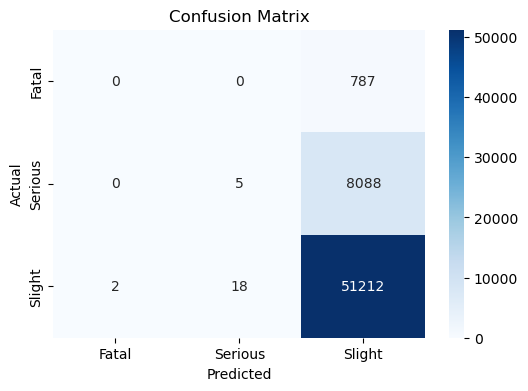

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting relevant features
features = ['Speed_limit', 'Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Number_of_Vehicles']
target = 'Accident_Severity'

# Dropping rows with missing values
df = df[features + [target]].dropna()

# Encoding categorical features
encoder = LabelEncoder()
for col in ['Weather_Conditions', 'Light_Conditions', 'Road_Type']:
    df[col] = encoder.fit_transform(df[col])

# Splitting dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy *100 :.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**since the accuracy of this model shows 85% this model can perform better on an unseen data**